 Projet analyse de données by asma:

## TITLED: "Olympics Althlete Events Analysis"

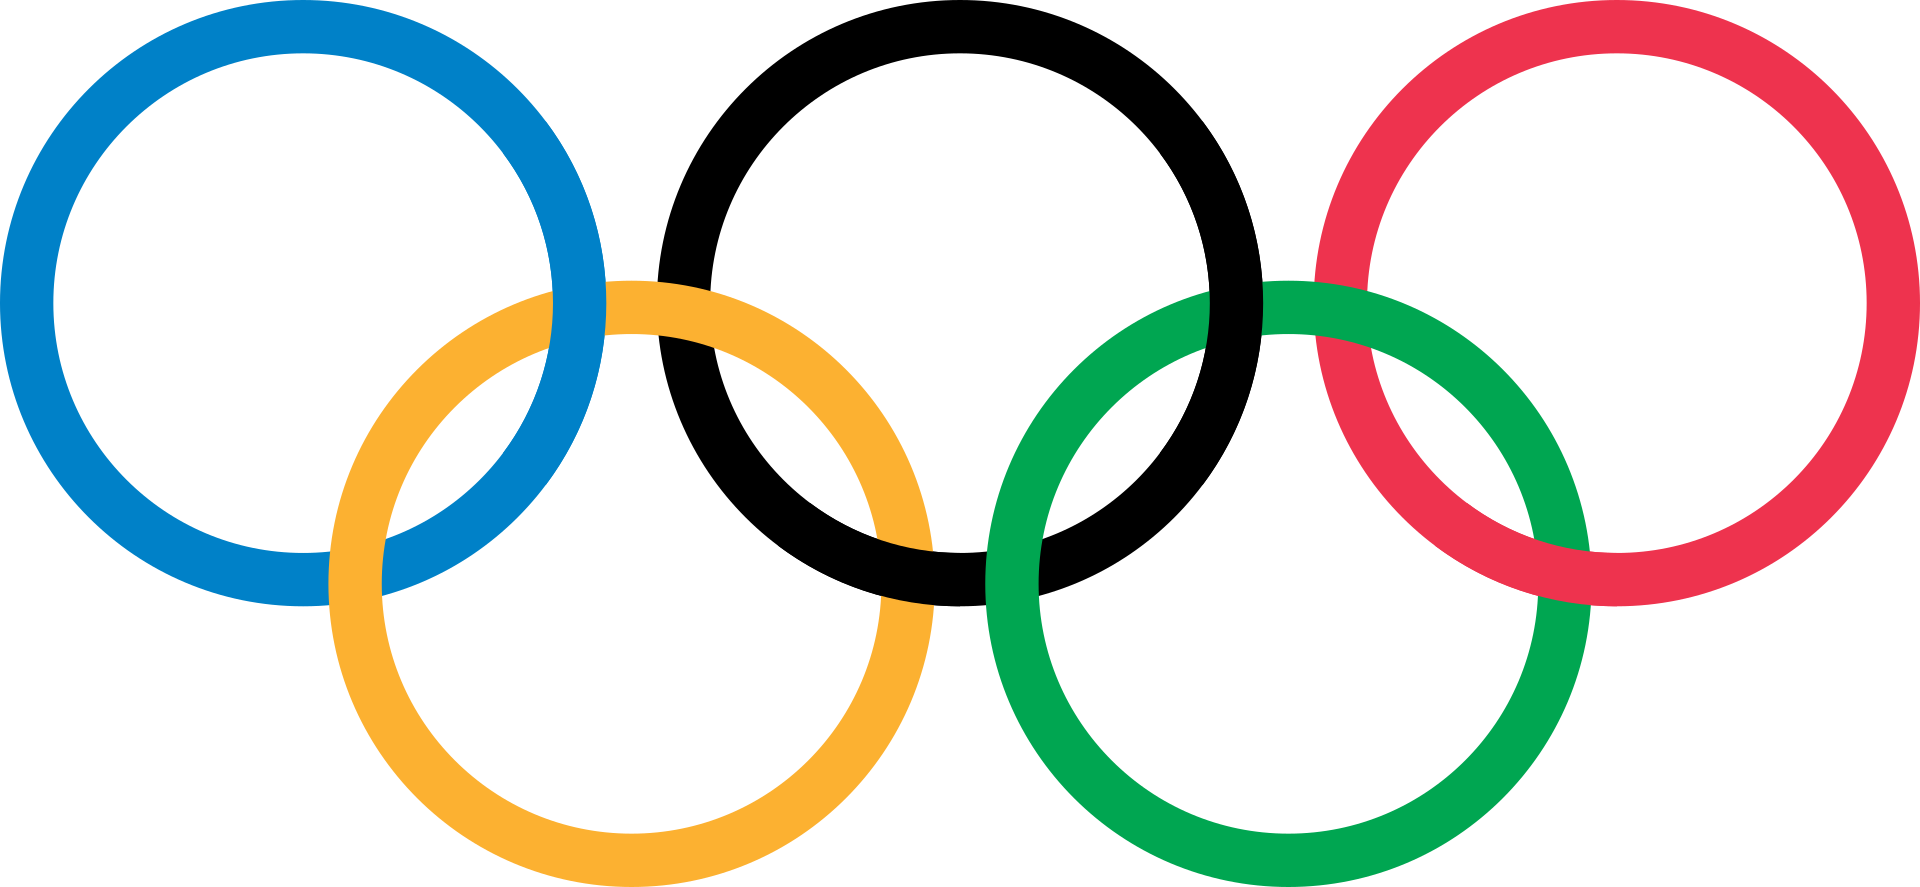

In [57]:
from IPython.display import Image
Image(filename='images/olympic_rings.png')


# Importing packages

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extracting valuable information from the dataset



In [59]:
olympics= pd.read_csv("data/athlete_events.csv")
olympics


,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


**+Checking The Shape of The Dataframe And The Missing Values**

In [60]:
olympics.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   sex     271116 non-null  object 
 3   age     261642 non-null  float64
 4   height  210945 non-null  float64
 5   weight  208241 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   games   271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [77]:
print(olympics.head().to_markdown())

|    |   id | name                 | sex   |   age |   height |   weight | team           | noc   | games       |   year | season   | city           | sport      | event                        | medal   |
|---:|-----:|:---------------------|:------|------:|---------:|---------:|:---------------|:------|:------------|-------:|:---------|:---------------|:-----------|:-----------------------------|:--------|
|  0 |    1 | A Dijiang            | M     |    24 |      180 |       80 | China          | CHN   | 1992 Summer |   1992 | Summer   | Barcelona      | Basketball | Basketball Men's Basketball  | nan     |
|  1 |    2 | A Lamusi             | M     |    23 |      170 |       60 | China          | CHN   | 2012 Summer |   2012 | Summer   | London         | Judo       | Judo Men's Extra-Lightweight | nan     |
|  2 |    3 | Gunnar Nielsen Aaby  | M     |    24 |      nan |      nan | Denmark        | DEN   | 1920 Summer |   1920 | Summer   | Antwerpen      | Football   | Football Men's F

In [62]:
#loading and giving the statics to the olympics dataset
olympics.describe()

,id,age,height,weight,year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [64]:
olympics.shape

(271116, 15)

**+Checking Duplicated Values**

In [65]:
olympics.duplicated().sum()

1385

In [50]:
olympics.duplicated()

0         False
1         False
2         False
3         False
28        False
          ...  
271101    False
271104    False
271107    False
271110    False
271111    False
Length: 77345, dtype: bool

In [70]:
#dealing with the duplicated values
# sorting by first name
olympics.sort_values("id", inplace=True)
  
# dropping ALL duplicate values
olympics.drop_duplicates(subset="id",
                     keep=False, inplace=True)
                     
olympics.duplicated().sum()  

0

In [71]:
# displaying the data shape
olympics.shape

(77901, 15)

*=>Athlete_events dataset contains 77901 rows of data and 15 columns, which has individual entries for each athlete:*

**+Checking The Types Of Data**

In [ ]:
olympics.columns

Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')

In [55]:
olympics.dtypes

id          int64
name       object
sex        object
age       float64
height    float64
weight    float64
team       object
noc        object
games      object
year        int64
season     object
city       object
sport      object
event      object
medal      object
dtype: object

*==>Now we have clean and well-organized dataframe.*

 ## I-Explore: 

**In which year and city did the Netherlands win the highest number of medals in their history?**

In [45]:
# Selecting only netherland team
netherland_data = olympics[olympics['team'] == 'Netherlands']

In [72]:
print(netherland_data)

            id                                   name sex   age  height  \
88          27                          Johan Aantjes   M  26.0     NaN   
91          29                   Willemien Aardenburg   F  22.0     NaN   
263        135                           Lois Abbingh   F  23.0   178.0   
798        456                             Karin Abma   F  24.0   174.0   
1250       703     Marianne "Marjan" Ackermans-Thomas   F  26.0   180.0   
...        ...                                    ...  ..   ...     ...   
271006  135518       Guillaum Franois "Frank" Zweerts   M  21.0   186.0   
271007  135519    Jeronemus Johannes "Jeroen" Zweerts   M  27.0   183.0   
271028  135532                   Edward "Eddie" Zwier   M  26.0   176.0   
271029  135533  Petronella Veronica Maria "Nel" Zwier   F  23.0   174.0   
271034  135536                      Henri Timo Zwiers   M  36.0     NaN   

        weight         team  noc        games  year  season            city  \
88         NaN  Neth

In [78]:
# we now grouping data by city and year and then count number of medal of particular year and city
medals_won_each_year_and_city = netherland_data.groupby(['year','city'])['medal'].count()
medals_won_each_year_and_city

year  city                  
1900  Paris                      1
1906  Athina                     0
1908  London                    11
1912  Stockholm                 16
1920  Antwerpen                 25
1924  Paris                      5
1928  Amsterdam                 27
      Sankt Moritz               0
1932  Los Angeles                0
1936  Berlin                    18
      Garmisch-Partenkirchen     0
1948  London                    12
1952  Helsinki                   3
      Oslo                       0
1956  Cortina d'Ampezzo          0
      Stockholm                  0
1960  Roma                       0
1964  Tokyo                     10
1968  Mexico City                7
1972  Munich                     0
      Sapporo                    0
1976  Innsbruck                  0
      Montreal                   4
1980  Lake Placid                0
      Moskva                     1
1984  Los Angeles                9
      Sarajevo                   0
1988  Seoul               

In [79]:
# the resultant value will be a series so we are converting it into a dataframe 
labeled_medals_data = medals_won_each_year_and_city.rename('No_of_medals')
final_data = pd.DataFrame(labeled_medals_data)
print(final_data)

                             No_of_medals
year city                                
1900 Paris                              1
1906 Athina                             0
1908 London                            11
1912 Stockholm                         16
1920 Antwerpen                         25
1924 Paris                              5
1928 Amsterdam                         27
     Sankt Moritz                       0
1932 Los Angeles                        0
1936 Berlin                            18
     Garmisch-Partenkirchen             0
1948 London                            12
1952 Helsinki                           3
     Oslo                               0
1956 Cortina d'Ampezzo                  0
     Stockholm                          0
1960 Roma                               0
1964 Tokyo                             10
1968 Mexico City                        7
1972 Munich                             0
     Sapporo                            0
1976 Innsbruck                    

In [81]:
# Finally sorted the dataframe by no_of_medals and sort in descending order and selected 1 row
sorted_final_data = final_data.sort_values('No_of_medals',ascending=False).head(1)
sorted_final_data

,,No_of_medals
year,city,
1928,Amsterdam,27


## II-Visualize: 

**Lets visualize the number of players send by the country on each event vs the number of medals they recieve:**

In [83]:
# we are now getting the number of players played in each event and each country
no_of_players_and_medal = olympics.groupby(['team','event']).agg({'id':'count','medal':'count'})
# sorting players by id
sorted_players = no_of_players_and_medal.sort_values('medal',ascending=False).head().reset_index()
print(sorted_players)

            team                        event   id  medal
0         Canada  Ice Hockey Men's Ice Hockey  249    175
1  United States  Basketball Men's Basketball  174    174
2  United States  Ice Hockey Men's Ice Hockey  260    117
3  United States    Rowing Men's Coxed Eights  145     97
4         Brazil      Football Men's Football  186     86


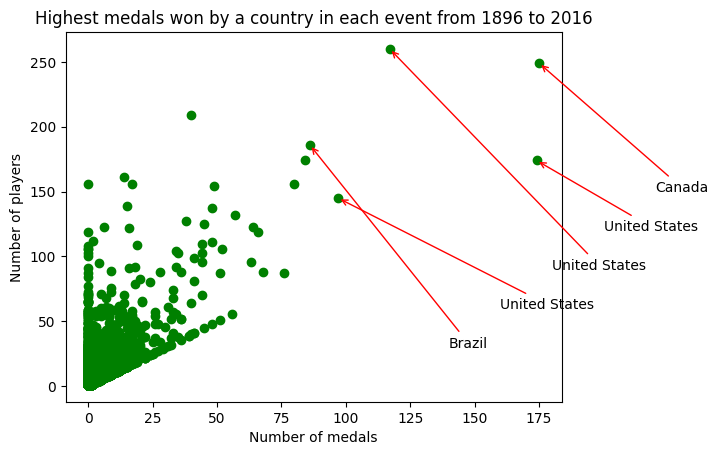

In [84]:
# lets visualize our data

import matplotlib.pyplot as plt

fig , ax = plt.subplots()

# making scatter plot of number of player vs number of medal won in each country and events
ax.scatter(no_of_players_and_medal['medal'],no_of_players_and_medal['id'],color='green')
ax.set_xlabel('Number of medals')
ax.set_title('Highest medals won by a country in each event from 1896 to 2016')
ax.set_ylabel('Number of players')
# print(sorted_players['medal'].dtype)
# teams = ["Canada","Usa","Sweden","Usa","India"]
x = 220
y = 150

# making a annotation this is used to mark specific values on the plot so in this case we are marking top 5 plots using for loop
for index , team in sorted_players.iterrows():
    ax.annotate(team['team'],xy=(team['medal'],team['id']),xytext=(x,y),arrowprops={'arrowstyle':'->','color':'red'})
    y = y - 30
    x = x - 20
    
plt.show()

*==>United states is the city that received the biggest number of medals from 1896 to 2016.*

## III-Analyze: 

**In which sports does the height of an athlete increase their chances of earning a medal?**

In [85]:
olympics[(olympics["team"]=="United States") & (olympics["season"]=="Winter") & (olympics["year"]==1980)].head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
5010,2856,Lisa-Marie Allen,F,19.0,NaN,NaN,United States,USA,1980 Winter,1980,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN
12891,7011,"Wiliam Robert ""Bill"" Baker",M,23.0,185.0,89.0,United States,USA,1980 Winter,1980,Winter,Lake Placid,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold
29894,15423,Neal LaMoy Broten,M,20.0,175.0,70.0,United States,USA,1980 Winter,1980,Winter,Lake Placid,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold
32302,16605,Donna Margaret Burke,F,25.0,165.0,61.0,United States,USA,1980 Winter,1980,Winter,Lake Placid,Luge,Luge Women's Singles,NaN
38689,19907,Susan Hall Charlesworth,F,26.0,162.0,53.0,United States,USA,1980 Winter,1980,Winter,Lake Placid,Luge,Luge Women's Singles,NaN


In [87]:
olympics[(olympics.weight.isna())&olympics.medal.isna()]

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
58,19,Win Valdemar Aaltonen,M,54.0,NaN,NaN,Finland,FIN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
88,27,Johan Aantjes,M,26.0,NaN,NaN,Netherlands,NED,1984 Summer,1984,Summer,Los Angeles,Water Polo,Water Polo Men's Water Polo,NaN
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271005,135517,Fritz Zwazl,M,22.0,NaN,NaN,Austria,AUT,1948 Summer,1948,Summer,London,Swimming,Swimming Men's 100 metres Backstroke,NaN
271034,135536,Henri Timo Zwiers,M,36.0,NaN,NaN,Netherlands,NED,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
271038,135539,Marius Edmund Zwiller,M,18.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN


In [88]:
mean_age = df.age.mean()
df["age"].fillna(value=mean_age, inplace=True)
df = df.astype({"age":int, "name":str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   sex     271116 non-null  object 
 3   age     271116 non-null  int64  
 4   height  210945 non-null  float64
 5   weight  208241 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   games   271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 31.0+ MB


Medals for Countries

In [90]:
pivot_country = olympics.pivot_table(index="team", columns="medal", aggfunc=({"medal":"count"}), fill_value=0)
pivot_country.columns = pivot_country.columns.droplevel(0)
pivot_country = pivot_country.reset_index().rename_axis(None, axis=1)
pivot_country["Total"] = pivot_country.Bronze + pivot_country.Gold + pivot_country.Silver
pc_head = pivot_country.sort_values(by=["Gold","Silver","Bronze"], ascending=[False, False, False]).head(10)
pc_head

,team,Bronze,Gold,Silver,Total
339,United States,449,771,482,1702
296,Soviet Union,234,290,220,744
49,Canada,136,174,163,473
121,Great Britain,156,163,143,462
116,Germany,186,160,153,499
306,Sweden,123,126,108,357
154,Italy,130,120,137,387
80,East Germany,65,111,97,273
105,France,128,96,148,372
269,Russia,92,90,68,250


In [92]:
olympics_medal = olympics[olympics.medal.notna()]
olympics_medal = olympics_medal[olympics_medal["team"].isin(pc_head["team"])]
olympics_medal

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
186,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
214,103,Silvano Abba,M,25.0,NaN,NaN,Italy,ITA,1936 Summer,1936,Summer,Berlin,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
286,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270715,135384,"Giovanni Battista ""Gianni"" Zuddas",M,20.0,NaN,NaN,Italy,ITA,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Bantamweight,Silver
270727,135393,Steffen Zhlke,M,23.0,198.0,92.0,East Germany,GDR,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Bronze
270934,135488,Nataliya Vladimirovna Zuyeva,F,19.0,176.0,62.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold
270982,135504,Viktor Oleksandrovych Zviahintsev,M,25.0,178.0,79.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Football,Football Men's Football,Bronze


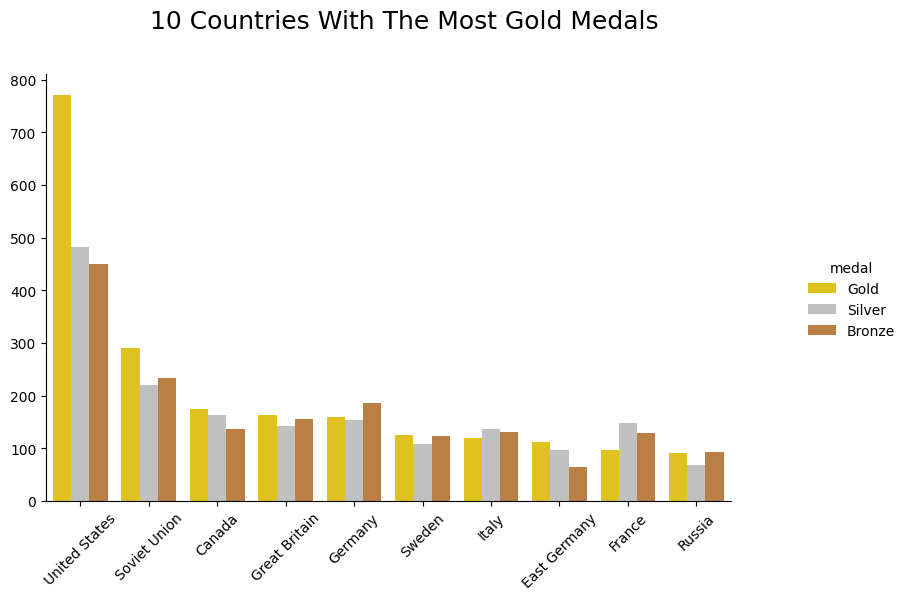

In [93]:
order_country = pc_head["team"].tolist()
order_medal = ["Gold","Silver","Bronze"]
g = sns.catplot(data=olympics_medal, x="team", hue="medal", kind="count", palette=["gold","silver","#cd7f32"], order=order_country, hue_order=order_medal)
g.fig.set_figwidth(10)
g.set(xlabel="", ylabel="")
g.fig.suptitle("10 Countries With The Most Gold Medals", y=1.10, fontsize=18)
plt.xticks(rotation=45)
plt.show()